# Breast Cancer Prediction

To analyze the given dataset to understand the factors contributing to breast cancer recurrence. The dataset includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).



In [2]:
# # Dataset Credits 

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M

# Project Ideation & help - Codebasics Ml course. https://codebasics.io/courses/machine-learning-for-data-science-beginners-to-advanced

**Import Necessary Libraries**

In [4]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek





### Part 1: Data Preparation and Exploration


In [6]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("breast_cancer_data.csv")
df.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [7]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())


Missing values in the dataset:
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64


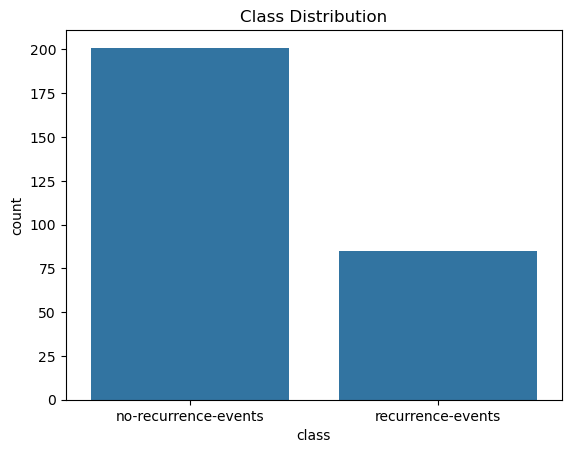

In [8]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset

sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()


In [9]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.

df = pd.get_dummies(df, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
df.head()

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [10]:
df.columns

Index(['deg-malig', 'class', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_09-May', 'tumor-size_14-Oct', 'tumor-size_15-19',
       'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34',
       'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49',
       'tumor-size_50-54', 'inv-nodes_05-Mar', 'inv-nodes_08-Jun',
       'inv-nodes_11-Sep', 'inv-nodes_14-Dec', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'node-caps_yes', 'breast_right',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')

### Part 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [12]:
# Step 1: Split the dataset into training and test sets
X = df.drop("class", axis = 1) 
y = df["class"]
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=42)


In [13]:
# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=2000)

In [14]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.92      0.82        59
   recurrence-events       0.64      0.33      0.44        27

            accuracy                           0.73        86
           macro avg       0.70      0.62      0.63        86
        weighted avg       0.72      0.73      0.70        86



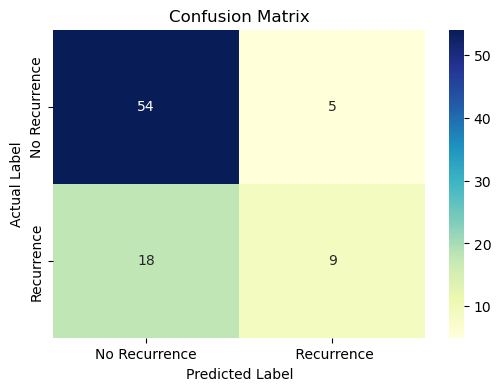

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=["no-recurrence-events", "recurrence-events"])
cm_df = pd.DataFrame(cm, index=["No Recurrence", "Recurrence"],
                        columns=["No Recurrence", " Recurrence"])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

### Part 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [17]:
# Step 1: Apply undersampling to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)



In [18]:
# Step 2: Train a Logistic Regression model using the undersampled training data
model_rus = LogisticRegression(max_iter=2000)
model_rus.fit(X_train_rus, y_train_rus)



LogisticRegression(max_iter=2000)

In [19]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_rus = model_rus.predict(X_test)
report_rus = classification_report(y_test, y_pred_rus)
print(report_rus)


                      precision    recall  f1-score   support

no-recurrence-events       0.80      0.73      0.76        59
   recurrence-events       0.50      0.59      0.54        27

            accuracy                           0.69        86
           macro avg       0.65      0.66      0.65        86
        weighted avg       0.70      0.69      0.69        86



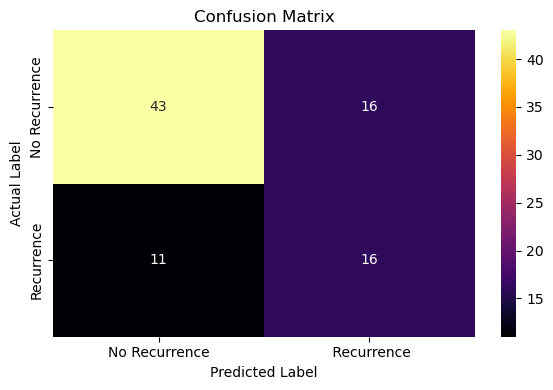

In [50]:
cm = confusion_matrix(y_test, y_pred_rus, labels=["no-recurrence-events", "recurrence-events"])
cm_df = pd.DataFrame(cm, index=["No Recurrence", "Recurrence"],
                        columns=["No Recurrence", " Recurrence"])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="inferno")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

### Part 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [21]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_smote, y_train_smote)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_smote = model_smote.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report with SMOTE:")
print(report_smote)

Classification Report with SMOTE:
                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.75      0.75        59
   recurrence-events       0.46      0.48      0.47        27

            accuracy                           0.66        86
           macro avg       0.61      0.61      0.61        86
        weighted avg       0.67      0.66      0.66        86



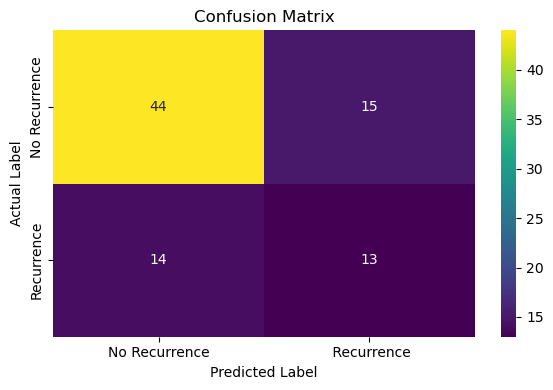

In [58]:
cm = confusion_matrix(y_test, y_pred_smote, labels=["no-recurrence-events", "recurrence-events"])
cm_df = pd.DataFrame(cm, index=["No Recurrence", "Recurrence"],
                        columns=["No Recurrence", " Recurrence"])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

### Part 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [23]:
smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model_tomek = LogisticRegression(max_iter=2000)
model_tomek.fit(X_tomek, y_tomek)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_tomek = model_tomek.predict(X_test)
report_tomek = classification_report(y_test, y_pred_tomek)
print("Classification Report with SMOTE Tomek Links:")
print(report_tomek)

Classification Report with SMOTE Tomek Links:
                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.68      0.73        59
   recurrence-events       0.46      0.59      0.52        27

            accuracy                           0.65        86
           macro avg       0.62      0.64      0.62        86
        weighted avg       0.68      0.65      0.66        86



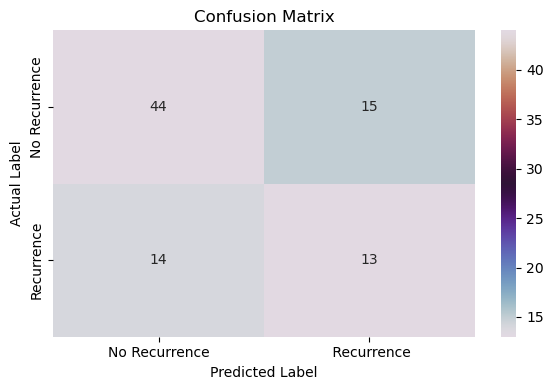

In [70]:
cm = confusion_matrix(y_test, y_pred_smote, labels=["no-recurrence-events", "recurrence-events"])
cm_df = pd.DataFrame(cm, index=["No Recurrence", "Recurrence"],
                        columns=["No Recurrence", " Recurrence"])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="twilight")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

### Part 6: Model deployment For Streamlit

In [25]:
import joblib
joblib.dump(model_tomek, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']